In [29]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import requests
from skimage.transform import radon, rescale
from skimage.color import rgba2rgb,rgb2gray, gray2rgb
from skimage.transform import iradon
from matplotlib.offsetbox import AnchoredText

plt.rcParams['figure.dpi'] = 300  

current_emoji = "🐶"  
emoji_code = "-".join(f"{ord(c):x}" for c in current_emoji).upper()
url = f"https://raw.githubusercontent.com/hfg-gmuend/openmoji/master/color/618x618/{emoji_code}.png"
emoji_data = Image.open(requests.get(url, stream=True).raw)
emoji_data = np.array(emoji_data.convert("RGBA")) 

In [30]:

def radon_iradon(emoji_data):
    image = emoji_data
   # image = rescale(image, scale=0.5, mode='reflect', channel_axis=None)
    theta = np.linspace(0., 180., max(image.shape), endpoint=False)
    sinogram = radon(image, theta=theta)
    reconstruction_fbp = iradon(sinogram, theta=theta, filter_name='shepp-logan')
    return reconstruction_fbp



(-0.5, 617.5, 617.5, -0.5)

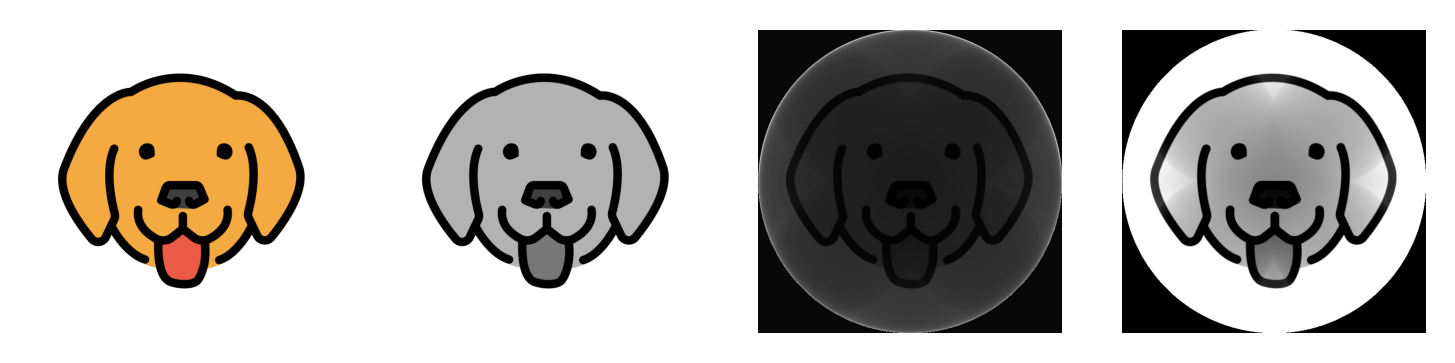

In [51]:

plt.subplot(2,4,1)
plt.imshow(emoji_data , "gray")
plt.axis("off")

plt.subplot(2,4,2)
gray_emoji_data = np.uint8(255*rgb2gray(rgba2rgb(emoji_data)))
plt.imshow(gray_emoji_data , "gray")
plt.axis("off")

#filtered_image = radon_iradon(gray_emoji_data)

plt.subplot(2,4,3)
plt.imshow(filtered_image , "gray")
plt.axis("off")

plt.subplot(2,4,4)
new1 = np.clip((filtered_image)/0.9, 0,1)
new2 = gray2rgb(np.uint8(new1*255))
new3  = np.dstack((new2, np.full(new2.shape[:-1],255)))

plt.imshow(new3 , "gray")
plt.axis("off")

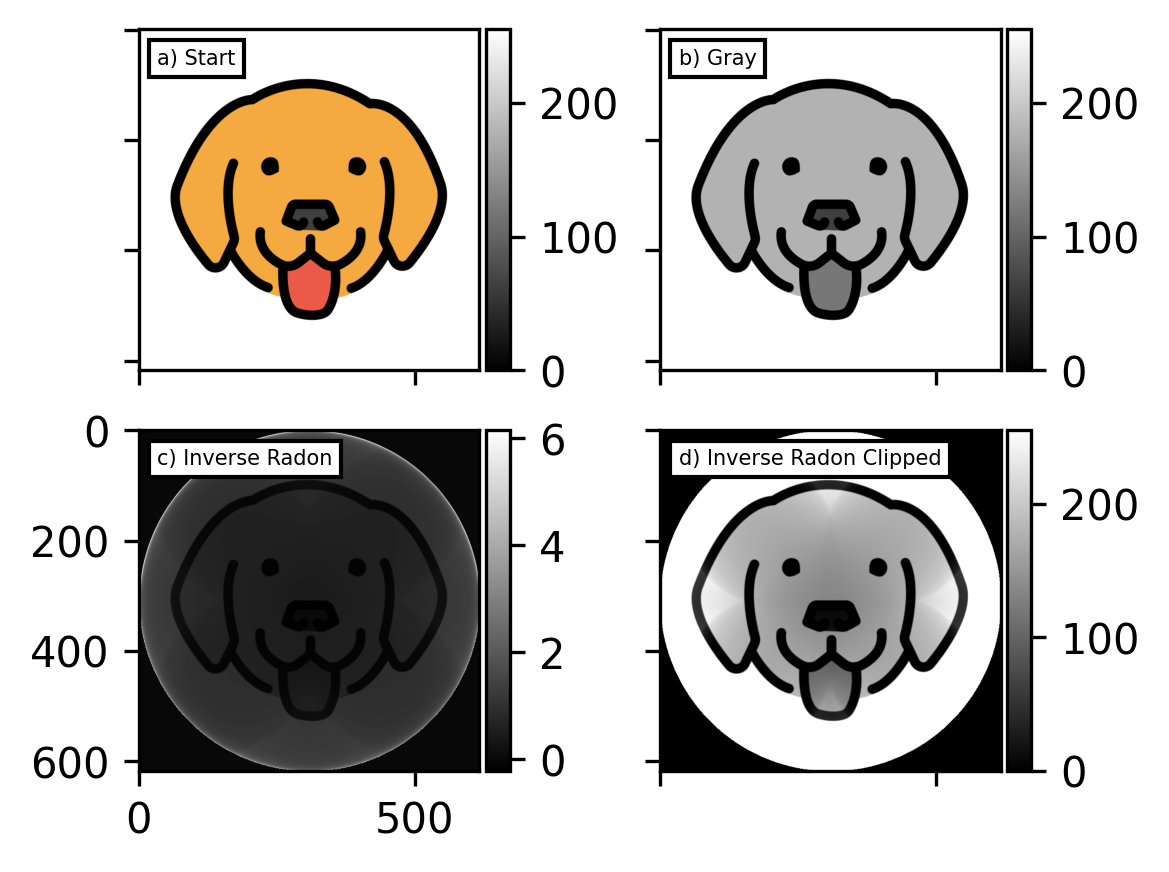

In [52]:
from mpl_toolkits.axes_grid1 import ImageGrid

fig = plt.figure(figsize=(4, 4))
grid = ImageGrid(
    fig,
    111,
    nrows_ncols=(2, 2),
    axes_pad=(0.5, 0.2),  # (horizontal, vertical)
    label_mode="1",
    cbar_location="right",
    cbar_mode="each",
    cbar_size="7%",
    cbar_pad="2%",
)

labels = ["a) Start", "b) Gray", "c) Inverse Radon", "d) Inverse Radon Clipped"]
for ax, im, cax, label in zip(grid, [emoji_data, gray_emoji_data, filtered_image, filtered_image_new], grid.cbar_axes , labels):
    img = ax.imshow(im, cmap="gray")
    cax.colorbar(img)
    at = AnchoredText(label, prop=dict(size=5), frameon=True, loc='upper left')
    at.patch.set_boxstyle("round,pad=0.,rounding_size=0.0")
    ax.add_artist(at)


fig.tight_layout()
plt.show()